# Tarea 1: Python.
# Procesamiento de lenguaje natural
## Alan García Zermeño
### CIMAT 31/01/2023

## 1- Construcción de un Corpus

Carpeta de Drive con el corpus de conferencias de AMLO hasta la fecha:

https://drive.google.com/drive/folders/16pij6WRtI_BpKAqq-ZL3H5Jm_LTBg1ae?usp=sharing

## 2- Vistazo a los datos

### 1.-Guardamos todas las conferencias en un solo _string_ en el ciclo _for_, después le aplicamos un _split_ para generar una sola lista con las palabras de todas las conferencias del corpus. En cada una de las coferencias eliminamos los primeros 800 caracteres, que no nos sirven.

### 2.-Imprimimos la cantidad de palabras que encontramos en todas las conferencias.

In [4]:
import nltk

In [8]:
import glob

amloConf = ""
for f_pagina in glob.glob("./estenograficas_limpias_por_fecha/*"):
    amloConf += (open(f_pagina,"r",encoding = "utf-8").read())[800:]

amloConfTok = amloConf.split()
len(amloConfTok)

11001741

### 3.- El vocabulario lo podemos representar como el número de palabras únicas que se usaron en todas las conferencias:

In [64]:
len(set(amloConfTok))

203888

### 4.- La riqueza del vocabulario la podemos medir como la razón entre el número de palabras totales y el número de palabras únicas. Entre más grande sea la razón, más repetición de palabras encontramos, menos riqueza del vocabulario. En este caso vemos que parece haber muchas palabras que se repiten en las conferencias.

In [65]:
len(amloConfTok)/len(set(amloConfTok))

53.95972788982186

### 5.- Realizamos el mismo proceso anterior pero con todo el texto en minúsculas.

In [84]:
amloConfTok = (amloConf.lower()).split()
len(amloConfTok)

11001741

In [85]:
len(set(amloConfTok))

187389

In [86]:
len(amloConfTok)/len(set(amloConfTok))

58.710708739573825

Al tokenizar todo en minúsculas vemos que en el primer ejercicio estaba detectando como _diferentes_ a la misma palabra cuando estaba en minúscula o cuando estaba en mayúscula, por ello, el vocabulario en minúsculas es todavía menor y la riqueza del vocabulario es por tanto aún más limitada.

### 6- Realizamos el mismo proceso ahora con el tokenizador de NLTK, donde usamos una expresión regular para quedarnos solo con palabras de letras minúsculas o mayúsculas.

Obviamente aquí nos encontraremos un número de tokens menores, sin embargo, la riqueza del vocabulario es incluso peor, ya que el tokenizador encuentra muchas palabas iguales.

In [2]:
from nltk import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-ZñÑáéíóúüÜÁÉÍÓÚ]+')
amloConfTok = tokenizer.tokenize(amloConf)

In [3]:
len(amloConfTok)

10866629

In [4]:
len(set(amloConfTok))

88127

In [5]:
len(amloConfTok)/len(set(amloConfTok))

123.30646680359027

In [7]:
from nltk import FreqDist

frqD = FreqDist(amloConfTok)
frqD.most_common(30)

[('de', 607312),
 ('que', 424392),
 ('la', 336262),
 ('a', 279435),
 ('el', 267589),
 ('en', 262613),
 ('y', 244519),
 ('se', 185266),
 ('los', 159159),
 ('no', 136912),
 ('es', 136471),
 ('lo', 100306),
 ('con', 100033),
 ('del', 94401),
 ('para', 93458),
 ('un', 92832),
 ('las', 88833),
 ('por', 86386),
 ('una', 72356),
 ('ya', 53550),
 ('más', 51074),
 ('porque', 49602),
 ('al', 48045),
 ('Y', 43648),
 ('como', 41971),
 ('pero', 41006),
 ('hay', 40970),
 ('también', 38925),
 ('está', 38414),
 ('este', 36418)]

### 7- Usamos ahora el _TweetTokenizer()_ haciendo todas las palabras minúsculas.

In [170]:
from nltk.tokenize import TweetTokenizer

tknt = TweetTokenizer()
amloConfTok = tknt.tokenize(amloConf.lower())
len(amloConfTok)

12740587

In [13]:
len(set(amloConfTok))

82450

In [14]:
len(amloConfTok)/len(set(amloConfTok))

154.52500909642208

## 3- Funciones NLTK

### 1.- Usando la función _concordance()_:

In [9]:
import nltk.corpus
from nltk.text import Text

amloConfTok = Text(amloConfTok)

In [173]:
amloConfTok.concordance("neoliberal",lines = 5)

Displaying 5 of 2186 matches:
atal y fallida durante el periodo neoliberal , sobre todo a partir de que se d
autosuficientes antes del periodo neoliberal , y ahora estamos comprando la mi
da su capacidad , y en el periodo neoliberal , inclusive , las paraban o las s
 , que participaron en el periodo neoliberal y causaron esta crisis de méxico 
tunidad de estudiar.en el periodo neoliberal una de las características , algo


In [91]:
amloConfTok.concordance("confianza", lines = 5)

Displaying 5 of 1922 matches:
sturas y como le tenemos respeto y confianza al pueblo sabemos que no hay ningu
examen de nuevo , por el examen de confianza y se integraron para fortalecer la
modificaciones en los controles de confianza de los cuerpos de seguridad en los
del presupuesto se les protege con confianza . increíble . todo esto se tiene q
ciativa de reforma , es una ley de confianza ciudadana para que la supervisión 


In [174]:
amloConfTok.concordance("seguridad",lines = 5)

Displaying 5 of 10436 matches:
federativas y las instituciones de seguridad social con la secretaría de salud 
o la efectividad de la vacuna y la seguridad de la vacuna . se presentará en es
 medidas de control sanitario , de seguridad sanitaria , van encaminadas a eso 
ógicas incluso , a los márgenes de seguridad esperados de acuerdo a la informac
a de salud sobre sus protocolos de seguridad sanitaria . la secretaría de salud


In [46]:
amloConfTok.concordance("bienestar",lines = 5)

Displaying 5 of 4918 matches:
bi , el instituto de salud para el bienestar , que coordina toda esta capacidad
id - 19 instituto de salud para el bienestar jóvenes construyendo el futuro lic
ridad y la violencia , el que haya bienestar , que se atienda a los jóvenes . e
id - 19 instituto de salud para el bienestar jóvenes construyendo el futuro lic
 jóvenes tengan trabajo , que haya bienestar . eso es lo que se está proponiend


In [54]:
amloConfTok.concordance("transformación",lines = 5)

Displaying 5 of 2731 matches:
 y , también , es un proceso de transformación que va a llevar su tiempo . ya 
as facultades , impulsando esta transformación . por ejemplo , en los nuevos m
 llevar a cabo los cambios , la transformación que requiere nuestro país . est
abajando más en el inicio de la transformación , en el inicio de los programas
bien todos . ¿ qué es la cuarta transformación ? portarnos bien , que se acabe


### 2.- Palabras similares usadas con _ejército_:

Una particularidad del gobierno de AMLO ha sido el poder que le ha dado al ejército, por lo que es normal que use esa palabra en un contexto similar a "pueblo", "bienestar", palabras con las que suele defender sus motivos de intervención del ejército, también es normal encontrar "aeropuerto", ya que el Felipe Ángeles está bajo el mando del ejército.
Respeto a los contextos comunes, vemos que en su mayoría son artículos y preposiciónes que tal vez no aporten mucho, pero llama la atención que los contextos comunes de "ejército"-"pueblo" y "ejército"-"bienestar" sean tan similares.

In [104]:
amloConfTok.similar("ejército")

gobierno país estado pueblo presidente año presupuesto día mundo que y
trabajo tema programa tiempo aeropuerto caso dinero bienestar
gobernador


In [106]:
amloConfTok.common_contexts(["ejército","pueblo"])

del_y el_y del_de el_mexicano del_mexicano el_la del_en al_y el_de
un_de al_a del_la del_se del_que el_no el_en al_para el_se el_como
el_que


In [108]:
amloConfTok.common_contexts(["ejército","bienestar"])

del_y el_y del_de el_la del_en al_y el_de al_a del_la del_se del_que
el_no el_en el_se el_como el_que el_para el_a del_para del_a


In [111]:
amloConfTok.common_contexts(["ejército","mundo"])

del_y el_y del_de el_la del_en al_y el_de un_de al_a del_la del_se
del_que el_no el_en al_para el_se el_como el_que el_para el_a


### 3.- Usaremos ahora la librería _time_ para organizar las conferencias por fecha y poder hacer un análisis respecto del tiempo con _nltk_

In [13]:
import glob
from datetime import datetime

a = []
for f_pagina in glob.glob("./estenograficas_limpias_por_fecha/*"):
    t = f_pagina.replace("./estenograficas_limpias_por_fecha/","")
    if(len(t) == 10):
        a.append(datetime.strptime(t,'%Y-%m-%d').date())
    else:
        if(t[11]=="2"):
            a.append(datetime.strptime(t,'%Y-%m-%d_2da').date())
        else:
            a.append(datetime.strptime(t,'%Y-%m-%d_3ra').date())
a.sort()
amloConf = (open("./estenograficas_limpias_por_fecha/"+str(a[0]),"r",encoding = "utf-8").read())[700:]
for k in range(1,len(a)):
    if a[k] == a[k-1]:
        if a[k-1] == a[k-2]:
            amloConf += (open("./estenograficas_limpias_por_fecha/"+str(a[k])+"_3ra","r",encoding = "utf-8").read())[800:]
        else:
            amloConf += (open("./estenograficas_limpias_por_fecha/"+str(a[k])+"_2da","r",encoding = "utf-8").read())[800:]
    else:
        amloConf += (open("./estenograficas_limpias_por_fecha/"+str(a[k]),"r",encoding = "utf-8").read())[800:]

#amloConfTok = nltk.word_tokenize(amloConf.lower())
#amloConfTok = Text(amloConfTok)

In [14]:
from nltk.tokenize import TweetTokenizer

tknt = TweetTokenizer()
amloConfTok = tknt.tokenize(amloConf.lower())

In [18]:
amloConfTok = Text(amloConfTok)
amloConfTok.concordance("ganso")

Displaying 25 of 42 matches:
 . se acabó la corrupción . me canso ganso . pregunta : buenos días . president
va a acabar la corrupción . me canso ganso . pero aquí hay la virtud de la hone
sí como lo vengo diciendo : me canso ganso . va porque va . y lo vamos a hacer 
mexicanos . esto se acaba . me canso ganso . ahí nos vemos , nos vemos mañana .
va a acabar la corrupción . me canso ganso . yo estoy , por eso , muy contento 
a acabar con la impunidad , me canso ganso . el problema de méxico no es la fal
ién se cansa primero . pero me canso ganso de que vamos a poner orden . imagíne
 va a acabar la impunidad . me canso ganso . pregunta : ( inaudible ) . preside
a acabar con la impunidad ; me canso ganso . pregunta : aquí , en nuevo león . 
oy a cumplir . y , repito , me canso ganso , se va a acabar con la corrupción y
 acabar con la corrupción . me canso ganso . entonces , vamos a permitirle al d
a corrupción , ahora sí que me canso ganso . no tengo duda sobre eso , de que v
corrupción 

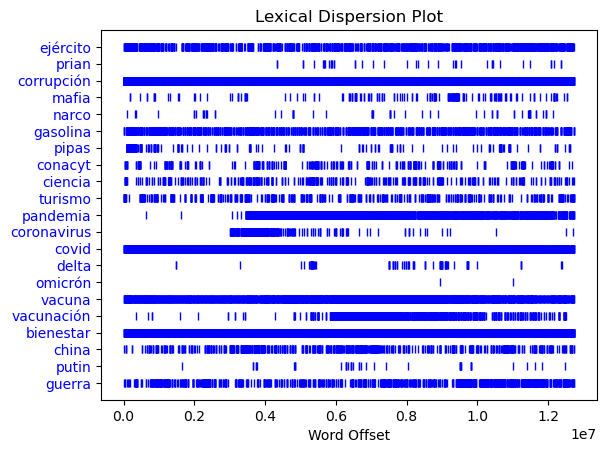

In [191]:
amloConfTok.dispersion_plot(["ejército","prian", "corrupción", "mafia", "narco", "gasolina", "pipas",
                             "conacyt", "ciencia","turismo", "pandemia", "coronavirus", "covid", "delta",
                             "omicrón", "vacuna", "vacunación","bienestar","china","putin","guerra"])

### 4.- Mostramos ahora las 50 colocaciones más comunes del texto.

In [192]:
amloConfTok.collocations(50)

andrés manuel; lópez obrador; manuel lópez; presidente andrés; estados
unidos; por ciento; buenos días; señor presidente; todos los; nada
más; guardia nacional; muchas gracias; desde luego; tren maya; adultos
mayores; por eso; por ejemplo; derechos humanos; sin embargo; mil
millones; baja california; marcelo ebrard; prensa matutina; todas las;
creo que; quintana roo; muy importante; sobre todo; que que; por qué;
muy bien; nuestro país; ver con; tiene que; benito juárez; para que;
sembrando vida; comisión federal; los trabajadores; que nos; dos
bocas; seguridad pública; gobierno federal; poder judicial; nuevo
león; 5093 4900; documentosdocumentos gabinetegabinete; reserved
developed; rights reserved; 01800 080 1127


### 5.- Podemos ahora extraer un diccionario con las longitudes de palabras más grandes del documento, nos aseguramos de que la palabra se encuentre más de dos veces para intentar evitar errores y no tomamos en cuenta las que tienen puntos para evitar páginas de internet.

In [240]:
fdi = FreqDist(amloConfTok)
histlong = {len(x):y for (x,y) in fdi.items() if len(x) > 18 and y > 2 and "." not in x}

Text(0.5, 1.0, 'Histograma de longitud de palabras en las conferencias de AMLO')

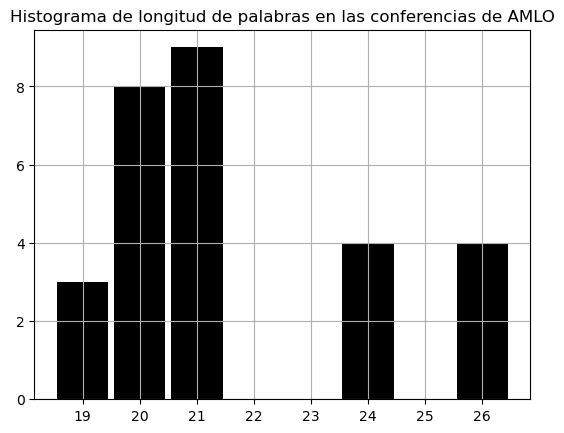

In [253]:
import matplotlib.pyplot as plt

plt.bar(histlong.keys(), histlong.values(), width = 0.9, color='black')
plt.grid()
plt.title("Histograma de longitud de palabras en las conferencias de AMLO")

### 6.- Mostramos ahora 50 palabras con longitud mayor a 8 y que se repitan más de 5 veces. Dejamos fuera algunas que son teléfonos o urls.

In [262]:
[x for x in set(fdi) if len(x) > 8 and fdi[x] > 5 and "." not in x and "0" not in x][:50]

['abastecimiento',
 'publicación',
 'elaboraron',
 'asesoramiento',
 'contactado',
 'notificación',
 'arruinaron',
 'cuestionaba',
 'mollinedo',
 'cambiaban',
 'contabilización',
 'repatriar',
 'suburbanas',
 'desazolvando',
 'retroactivo',
 'esperanzador',
 'heredados',
 'específica',
 'asesinados',
 'petrolero',
 'capacitada',
 'preocupes',
 'ascienden',
 'multimillonario',
 'coca-cola',
 'destruidos',
 'instalado',
 'importantísima',
 'consultor',
 'discusión',
 'reemplazar',
 'declaración',
 'macroeconómicas',
 'sobrecargos',
 'reiteradamente',
 'almirantes',
 'remuneración',
 'sonorenses',
 'auténticamente',
 'maltratado',
 'recomendando',
 'medianoche',
 'sumatoria',
 'fortaleceremos',
 'orgulloso',
 'consumidos',
 'transparentan',
 'turbosina',
 'idiosincrasia',
 'representa']

### 7.- Podemos representar el uso de ciertas palabras con respecto al tiempo con la función _ConditionalFreqDist()_. Aquí dividimos las conferencias por mes aproximada con la longitud del texto y analizamos el uso de las palabras: "ejército", "corrupción" y "pandemia".

In [337]:
a = []
for f_pagina in glob.glob("./estenograficas_limpias_por_fecha/*"):
    a.append(f_pagina.replace("./estenograficas_limpias_por_fecha/","")[:7])
bins = sorted(list(set(a[2:])))

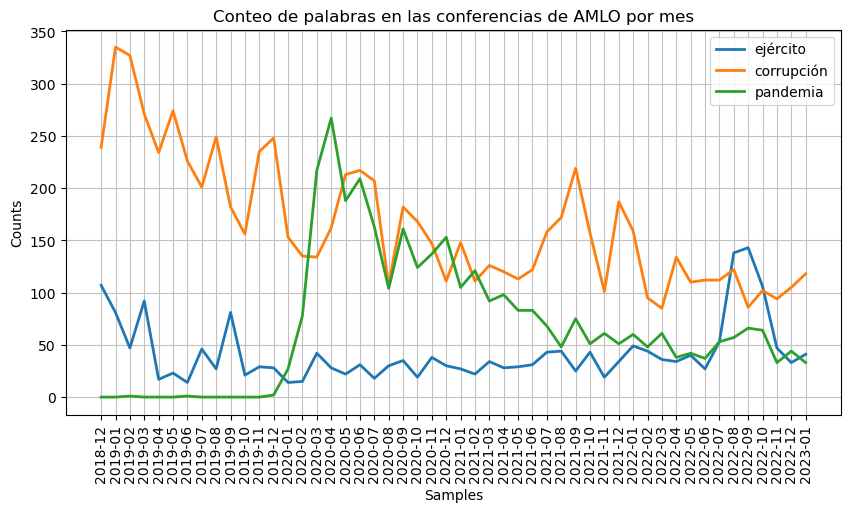

In [347]:
words = ["ejército","pandemia","corrupción"]
cfdist = nltk.ConditionalFreqDist()
nbins = len(amloConfTok)//len(bins)
for i in range(len(bins)):
    for word in amloConfTok[i*nbins:(i+1)*nbins]:
        if(word in words):
            cfdist[word][bins[i]] += 1

plt.figure(figsize=(10, 5))
plt.title("Conteo de palabras en las conferencias de AMLO por mes")
cfdist.plot()
plt.show()

### 8.- Si filtramos el corpus usando las _stopwords_ en español vemos que el tamaño de nuestra lista se reduce casi a la mitad a pesar de que solo estamos quitando alrededor de 300 palabras.

In [342]:
stopwords = nltk.corpus.stopwords.words('spanish')
amloConfTokStop = [t for t in amloConfTok if t not in stopwords]

In [350]:
len(amloConfTok)/len(amloConfTokStop)

1.7889711907806904

In [351]:
len(set(amloConfTok))/len(set(amloConfTokStop))

1.003285430939025

### 9.- Por último mostramos las 300 palabras más repetidas usando el _tweetTokenizer_ y filtrando las _stopwords_ en español.

In [373]:
frqD = FreqDist(amloConfTokStop)
frqD.pprint(maxlen = 300)

FreqDist({',': 1005894, '.': 423213, ':': 95171, 'presidente': 71799, '¿': 50321, '?': 50205, 'si': 39026, 'lópez': 37229, 'obrador': 37109, 'manuel': 36525, 'andrés': 35914, 'entonces': 34875, 'va': 33072, 'vamos': 33007, 'méxico': 31279, ';': 30908, 'mil': 28945, 'gobierno': 22514, 'aquí': 22073, 'dos': 18789, 'ahora': 17674, 'nacional': 17489, 'ver': 17476, 'pues': 16790, '-': 16271, 'caso': 15857, '‘': 15420, 'ahí': 14938, 'millones': 14803, 'bueno': 14716, 'país': 14672, '’': 14663, 'pregunta': 14662, 'días': 14345, 'cómo': 14294, 'van': 13852, 'ser': 13746, 'usted': 13500, 'hacer': 13451, 'pesos': 13303, 'señor': 13224, 'así': 13068, 'gente': 13015, '…': 12751, 'gracias': 12114, 'ciento': 12085, 'pueblo': 11840, 'salud': 11686, 'tema': 11586, 'bien': 11308, 'tres': 11153, 'año': 11047, 'decir': 10808, 'años': 10785, 'importante': 10734, 'puede': 10669, 'parte': 10630, 'tener': 10527, 'mismo': 10458, 'seguridad': 10436, 'día': 10365, 'información': 10335, 'hoy': 10306, 'manera': 1

## 4- Otras librerías en Python

### 1.- 
A parte de NLTK, existen más librerías de python que te permiten hacer NLP, dependerá el tipo de proyecto que se busque desarrollar para saber cuál es la librería más conveniente:

_spaCy_ es una librería diseñada pensando en producción, por lo que la hace una poderosa librería para hacer NLP estadístico, por tanto requiere una robusta base de datos para poder funcionar adecuadamente. https://spacy.io/

Otra librería es TextBlob, que está diseñada de forma muy amigable, por lo que es perfecta para introducirte en NLP, sin embargo, por esta misma razón, no es una librería lo suficiente robusta para realizar grandes proyectos. https://textblob.readthedocs.io/en/dev/

## 2.-
Por supuesto, podemos encontrar otras opciones en otros lenguajes de programación:
De las librerías de NLP más usadas en Java, podemos encontrar _Apache OpenNLP_, que te permite realizar operaciones y cálculos similares a NLTK en python con facilidad y simplicidad aunque no es la más robusta para trabajar grandes proyectos y solo es para procesamiento de texto tiene muy buena documentación.
https://opennlp.apache.org/

En R también existen muchas posibilidades según tu proyecto, una de ellas es _Stringr_, que te permite de manera muy intuitiva y sencilla hacer operaciones sencillas para realizar NLP, sin embargo es básica y requerirás opciones más potentes para realizar análisis estadísticos potentes.
https://stringr.tidyverse.org/

Incluso podemos encontrar opciones para C# como _Catalyst_, que es una librería muy ágil para hacer NLP basado en el diseño de spaCy. Una desventaja de usar esta librería en C# es que es complicado encontrar buena documentación.
https://github.com/curiosity-ai/catalyst